
# Report: Correlation between rates of Gold Price and Crude Oil Price
=====================================================================================================
### Author: **[Parth Ghinaiya](https://github.com/parth-ghinaiya)**
-----------------------------------------------------------------------------------------------------
## Preparation
### Install Dependencies

In [46]:
%pip install --upgrade pip
%pip install matplotlib==3.8.2
%pip install numpy==1.26.3
%pip install pandas==1.5.3
%pip install SQLAlchemy==1.4.46
%pip install kaggle==1.5.16

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Dependencies

In [47]:
import os
import subprocess
import urllib.request
import zipfile
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from scipy.stats import pearsonr
from sqlalchemy import create_engine

### Load Data into Sqlite Database

In [48]:
# Run datapipeline to create database if it doesn't exist
subprocess.run(["./pipeline.sh"])

CompletedProcess(args=['./pipeline.sh'], returncode=0)

### Retrieve Data from Database

In [49]:
# Load data from database
crude_oil_price_db_engine = create_engine('sqlite:///../data/crude_oil_price.sqlite')
gold_price_db_engine = create_engine('sqlite:///../data/gold_price.sqlite')

# Create dataframe from database
crude_oil_price_df = pd.read_sql_table('crude_oil_price', crude_oil_price_db_engine)
gold_price_df = pd.read_sql_table('gold_price', gold_price_db_engine)

### Preprocess Data

In [50]:
# restore date with pandas datetime
crude_oil_price_df['date'] = pd.to_datetime(crude_oil_price_df['date'], format='%Y-%m-%d')
gold_price_df['date'] = pd.to_datetime(gold_price_df['Date'], format='%Y-%m-%d')

# Extract year from the date for grouping
crude_oil_price_df['year'] = crude_oil_price_df['date'].dt.to_period('Y').dt.year
gold_price_df['year'] = gold_price_df['date'].dt.to_period('M').dt.year

# Group by YearMonth and calculate the mean price
oil_monthly_avg = crude_oil_price_df.groupby('year')['price'].mean()
gold_monthly_avg = gold_price_df.groupby('year')['United States(USD)'].mean()

### Visualize Data  

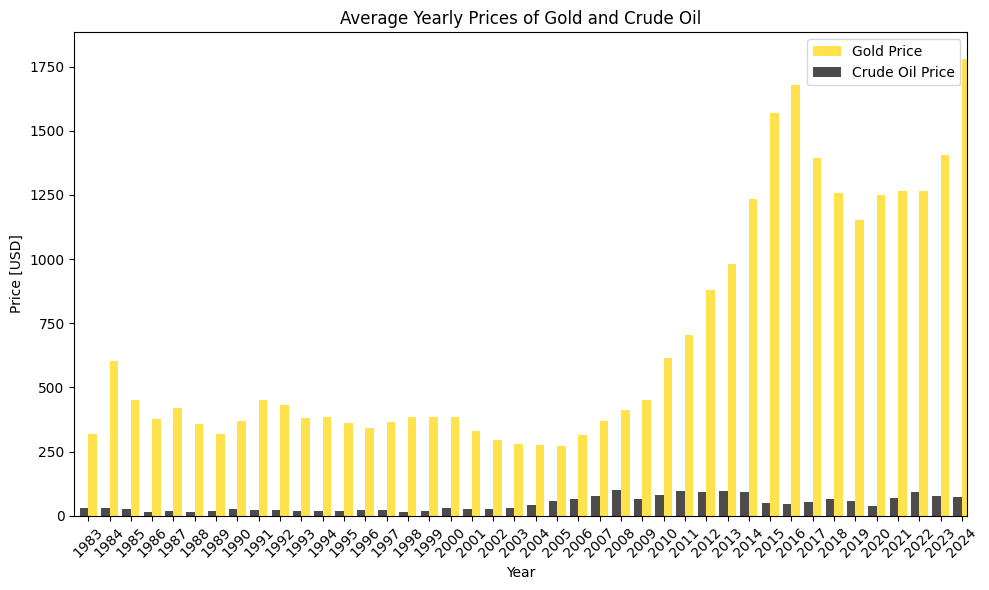

In [51]:
# Plotting graph for average yearly prices of gold and crude oil
fig, ax = plt.subplots(figsize=(10, 6))

gold_monthly_avg.plot(kind='bar', color='gold', alpha=0.7, position=0, width=0.4, label='Gold Price', ax=ax)
oil_monthly_avg.plot(kind='bar', color='black', alpha=0.7, position=1, width=0.4, label='Crude Oil Price', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Price [USD]')
ax.set_title('Average Yearly Prices of Gold and Crude Oil')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()